In [8]:
import warnings
warnings.filterwarnings("ignore") 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

1. Extract the reviews and ratings from the merged data file and make an array list of all the reviews
2. Map the values of rating into postive and negative with threshold >7

In [9]:
pd.set_option('display.max_columns', None)
drug_data = pd.read_csv('DrugReview_Dataset.csv')
#drug_data = drug_data[['Review', 'Rating', 'Drug']]
#check  reviews
for i in drug_data['Review'][7106:7112]:
    print(i,'\n')


"i got terrible gout in the hands after using it.  But then i did not drink all the water and still drank beer.  Read the packet!" 

"My mother has severe gout and has reactions to both apuranol and cholcine. She had to take predisone since she couldn&#039;t take the other medications. Since, she started taking Uloric it has controlled her gout without any side effects. 
Seems very effective and safe." 

"I had cataract surgery 7 days ago. Diamox is very effective to reduce the pressure in the eye but the problem is side effects. I had no appetite, constipation and hearing loss. I am hoping it will go away in few days. Anybody out there had similar experience, please share with us. Thanks." 

"My eye pressure still varies from 14 to 36.  Combigan did not work for me." 

"so far in 1st 6 weeks has lowered my eye pressure from 23  in both eyes to 14 in both eyes. It is a beta blocker so also can lower your blood pressure.  I&#039;ve reduced that effect by putting pressure at side of nose

# DATA VISUALISATION

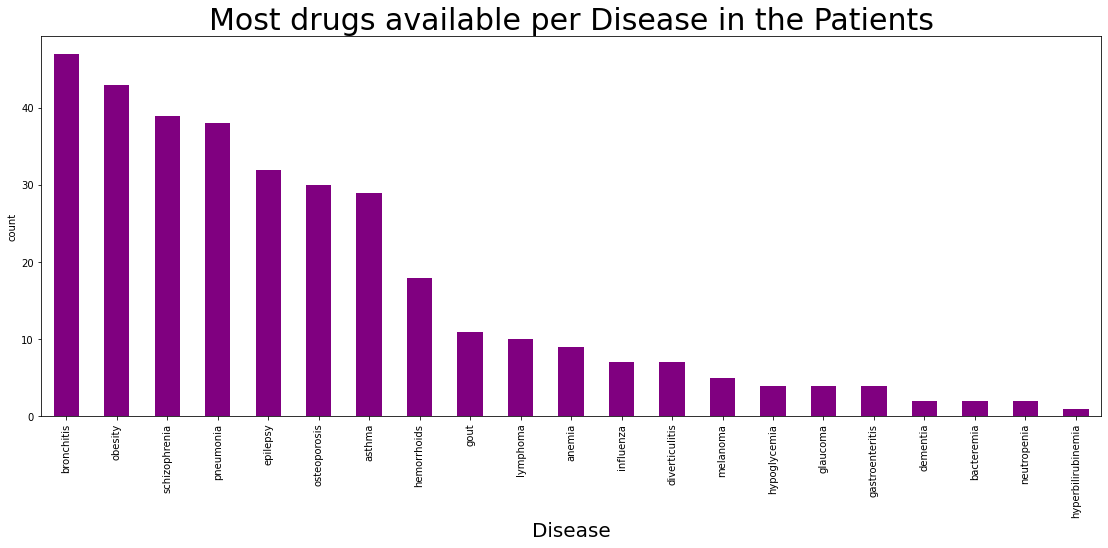

In [86]:
drug_data.groupby(['Disease'])['Drug'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (19, 7), color = 'purple')
plt.title('Most drugs available per Disease in the Patients', fontsize = 30)
plt.xlabel('Disease', fontsize = 20)
plt.ylabel('count')
plt.show()

In [10]:
drug_data['Rating'].value_counts()

10    3054
9     1455
1     1167
8     1130
7      520
5      407
6      346
2      332
3      297
4      198
Name: Rating, dtype: int64

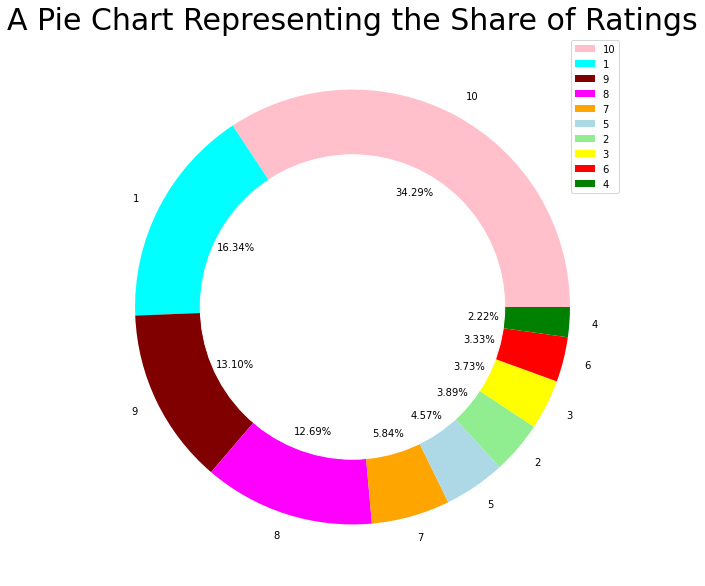

In [11]:
size = [3054, 1455, 1167, 1130, 520, 407,346, 332, 297,198]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'lightblue', 'lightgreen', 'yellow','red','green']
labels = "10", "1", "9", "8", "7", "5", "2", "3", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Share of Ratings', fontsize = 30)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [12]:
#import the libraries for pre-processing
from bs4 import BeautifulSoup
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

stops = set(stopwords.words('english')) #english stopwords

stemmer = SnowballStemmer('english') #SnowballStemmer

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

In [17]:
#apply review_to_words function on reviews
drug_data['Review'] = drug_data['Review'].apply(review_to_words)

In [18]:
#create sentiment feature from ratings
#if rating > 7 sentiment = 1 (positive)
#if rating < 7 sentiment = 0 (negative)
drug_data['Sentiment'] = drug_data["Rating"].apply(lambda x: 1 if x > 7 else 0)
drug_data.head(8108)

,Drug,Disease,Review,Rating,UsefulCount,Symptoms,Sentiment
0,Olanzapine,schizophrenia,drug save life almost atyp med luck mg zyprexa...,10,6,"['hallucinations auditory', 'hypersomnolence',...",1
1,Ziprasidone,schizophrenia,geodon effect drug complet wipe auditori hallucin,10,33,"['hallucinations auditory', 'hypersomnolence',...",1
2,Loxapine,schizophrenia,medicin complet chang life way voic eas functi...,10,22,"['hallucinations auditory', 'hypersomnolence',...",1
3,Ziprasidone,schizophrenia,geodon three week far side effect diffcult tak...,7,6,"['hallucinations auditory', 'hypersomnolence',...",0
4,Abilify,schizophrenia,switch risperid abilifi two year ago mg work m...,10,53,"['hallucinations auditory', 'hypersomnolence',...",1
...,...,...,...,...,...,...,...
8103,Amoxicillin / clavulanate,bronchitis,medicin gave diarrhea,1,25,"['cough', 'wheezing', 'shortness of breath', '...",0
8104,Guaifenesin,bronchitis,help loosen putti gunk lung make cough effect ...,7,61,"['cough', 'wheezing', 'shortness of breath', '...",0
8105,Ceftin,bronchitis,start take ceftin bronchiti felt better within...,10,36,"['cough', 'wheezing', 'shortness of breath', '...",1
8106,Guaifenesin,bronchitis,disclosur one person experi scientif valid how...,5,6,"['cough', 'wheezing', 'shortness of breath', '...",0


# SENTIMENTAL ANALYSIS

In [19]:
#import all the necessary packages

from sklearn.model_selection import train_test_split #import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #import TfidfVectorizer 
from sklearn.metrics import confusion_matrix #import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB #import MultinomialNB
from sklearn.ensemble import RandomForestClassifier  #import RandomForestClassifier

In [21]:
# Creates TF-IDF vectorizer and transforms the corpus
vectorizer = TfidfVectorizer()
reviews_corpus = vectorizer.fit_transform(drug_data.Review)
reviews_corpus.shape

(8906, 7128)

In [23]:
#dependent feature
sentiment = drug_data['Sentiment']
sentiment.shape

(8906,)

In [24]:
#split the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(reviews_corpus,sentiment,test_size=0.33,random_state=42)
print('Train data shape ',X_train.shape,Y_train.shape)
print('Test data shape ',X_test.shape,Y_test.shape)

Train data shape  (5967, 7128) (5967,)
Test data shape  (2939, 7128) (2939,)


In [25]:
#fit the model and predicct the output

clf = MultinomialNB().fit(X_train, Y_train) #fit the training data

pred = clf.predict(X_test) #predict the sentiment for test data

print("Accuracy: %s" % str (clf.score(X_test, Y_test))) #check accuracy
print("Confusion Matrix") 
print(confusion_matrix(pred, Y_test)) #print confusion matrix
print(classification_report(pred,Y_test))
#preds = clf.predict(reviews_corpus)

Accuracy: 0.7437904048996257
Confusion Matrix
[[ 381   67]
 [ 686 1805]]
              precision    recall  f1-score   support

           0       0.36      0.85      0.50       448
           1       0.96      0.72      0.83      2491

    accuracy                           0.74      2939
   macro avg       0.66      0.79      0.67      2939
weighted avg       0.87      0.74      0.78      2939



In [26]:
#fit the model and predicct the output

clf = RandomForestClassifier().fit(X_train, Y_train)

pred = clf.predict(X_test)

print("Accuracy: %s" % str(clf.score(X_test, Y_test)))
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))
print(classification_report(pred,Y_test))
preds = clf.predict(reviews_corpus)
#print(preds)

Accuracy: 0.8843143926505614
Confusion Matrix
[[ 793   66]
 [ 274 1806]]
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       859
           1       0.96      0.87      0.91      2080

    accuracy                           0.88      2939
   macro avg       0.85      0.90      0.87      2939
weighted avg       0.90      0.88      0.89      2939



In [28]:
drug_data['Predicted Sentiment'] = preds
drug_data.head(8108)

,Drug,Disease,Review,Rating,UsefulCount,Symptoms,Sentiment,Predicted Sentiment
0,Olanzapine,schizophrenia,drug save life almost atyp med luck mg zyprexa...,10,6,"['hallucinations auditory', 'hypersomnolence',...",1,1
1,Ziprasidone,schizophrenia,geodon effect drug complet wipe auditori hallucin,10,33,"['hallucinations auditory', 'hypersomnolence',...",1,1
2,Loxapine,schizophrenia,medicin complet chang life way voic eas functi...,10,22,"['hallucinations auditory', 'hypersomnolence',...",1,1
3,Ziprasidone,schizophrenia,geodon three week far side effect diffcult tak...,7,6,"['hallucinations auditory', 'hypersomnolence',...",0,0
4,Abilify,schizophrenia,switch risperid abilifi two year ago mg work m...,10,53,"['hallucinations auditory', 'hypersomnolence',...",1,1
...,...,...,...,...,...,...,...,...
8103,Amoxicillin / clavulanate,bronchitis,medicin gave diarrhea,1,25,"['cough', 'wheezing', 'shortness of breath', '...",0,0
8104,Guaifenesin,bronchitis,help loosen putti gunk lung make cough effect ...,7,61,"['cough', 'wheezing', 'shortness of breath', '...",0,0
8105,Ceftin,bronchitis,start take ceftin bronchiti felt better within...,10,36,"['cough', 'wheezing', 'shortness of breath', '...",1,1
8106,Guaifenesin,bronchitis,disclosur one person experi scientif valid how...,5,6,"['cough', 'wheezing', 'shortness of breath', '...",0,1


In [30]:
pred_labels = pd.DataFrame(drug_data)

In [31]:
pred_labels.to_csv("sentimental_reviews.csv")

In [32]:
df2 = pd.read_csv('sentimental_reviews.csv')

In [16]:
df2.iloc[7101:7120]

,Unnamed: 0,Drug,Disease,Review,Rating,UsefulCount,Symptoms,Sentiment,Predicted Sentiment
7101,7101,Allopurinol,gout,put zero probabl show week take start itch pa ...,1,40,"['hot flush', 'pain', 'redness', 'swelling', '...",0,0
7102,7102,Uloric,gout,gout tophus gout year ua normal ulor probeneci...,9,17,"['hot flush', 'pain', 'redness', 'swelling', '...",1,1
7103,7103,Febuxostat,gout,donat kidney diagnos first gout attack januari...,10,42,"['hot flush', 'pain', 'redness', 'swelling', '...",1,1
7104,7104,Febuxostat,gout,mother sever gout reaction apuranol cholcin ta...,10,70,"['hot flush', 'pain', 'redness', 'swelling', '...",1,1
7105,7105,Krystexxa,gout,husband sever gout start krystexxa bad take dr...,10,25,"['hot flush', 'pain', 'redness', 'swelling', '...",1,1
7106,7106,Allopurinol,gout,got terribl gout hand use drink water still dr...,1,51,"['hot flush', 'pain', 'redness', 'swelling', '...",0,0
7107,7107,Uloric,gout,mother sever gout reaction apuranol cholcin ta...,10,70,"['hot flush', 'pain', 'redness', 'swelling', '...",1,1
7108,7108,Diamox,glaucoma,cataract surgeri day ago diamox effect reduc p...,3,17,"['fall', 'distended abdomen', 'unsteady gait...",0,0
7109,7109,Brimonidine / timolol,glaucoma,eye pressur still vari combigan work,2,31,"['fall', 'distended abdomen', 'unsteady gait...",0,0
7110,7110,Brimonidine / timolol,glaucoma,far st week lower eye pressur eye eye beta blo...,8,22,"['fall', 'distended abdomen', 'unsteady gait...",1,1


In [33]:
df2 = df2.drop("Unnamed: 0", axis = 1)

In [34]:
df2

,Drug,Disease,Review,Rating,UsefulCount,Symptoms,Sentiment,Predicted Sentiment
0,Olanzapine,schizophrenia,drug save life almost atyp med luck mg zyprexa...,10,6,"['hallucinations auditory', 'hypersomnolence',...",1,1
1,Ziprasidone,schizophrenia,geodon effect drug complet wipe auditori hallucin,10,33,"['hallucinations auditory', 'hypersomnolence',...",1,1
2,Loxapine,schizophrenia,medicin complet chang life way voic eas functi...,10,22,"['hallucinations auditory', 'hypersomnolence',...",1,1
3,Ziprasidone,schizophrenia,geodon three week far side effect diffcult tak...,7,6,"['hallucinations auditory', 'hypersomnolence',...",0,0
4,Abilify,schizophrenia,switch risperid abilifi two year ago mg work m...,10,53,"['hallucinations auditory', 'hypersomnolence',...",1,1
...,...,...,...,...,...,...,...,...
8901,Integra F,anemia,pleas integra f treat iron defici anemia took ...,9,29,"['chill', 'guaiac positive', 'monoclonal', 'ec...",1,1
8902,Procrit,anemia,pot syndrom low blood plasma count begin year ...,1,0,"['chill', 'guaiac positive', 'monoclonal', 'ec...",0,0
8903,Multivitamin with iron,anemia,take twice day pregnant increas iron level how...,8,5,"['chill', 'guaiac positive', 'monoclonal', 'ec...",1,1
8904,Multivitamin with iron,anemia,haematocrit start take sss tonic within week h...,10,22,"['chill', 'guaiac positive', 'monoclonal', 'ec...",1,1


# DATA RECOMMENDATION

In [36]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('sentimental_reviews.csv')
df=df.drop(['Symptoms', 'Rating', 'Unnamed: 0'], axis=1)
df.Drug = df.Drug.str.upper()

In [103]:
predicted_disease = 'pneumonia'

In [104]:
 #function to get drugs based on sentiment review
def _DrugRecommender(df=df, predicted_disease=predicted_disease):
    #df['Rating'] = np.where(df['Rating']>7, 1, 0)
    df = df.loc[df['Disease'] == predicted_disease]
    df = df.loc[df['Predicted Sentiment'] == 1]
    df = df.sort_values(by = ['UsefulCount'], ascending=False)
    df = df[['Disease', 'Drug']]
    df = df.drop_duplicates()
    df = df.reset_index()
    df = df.drop(['index'], axis=1)
    df = df.head()

    return df

In [105]:
drug = _DrugRecommender()

In [106]:
print('List of recommened drugs based on useful count and sentiment analysis')
drug

List of recommened drugs based on useful count and sentiment analysis


,Disease,Drug
0,pneumonia,LEVAQUIN
1,pneumonia,LEVOFLOXACIN
2,pneumonia,AMOXICILLIN / CLAVULANATE
3,pneumonia,AUGMENTIN
4,pneumonia,DOXYCYCLINE


In [107]:
sd = pd.read_csv('drugLib_processed.csv')
sd = sd.drop(['condition', 'commentsReview'], axis=1)
sd = sd.dropna()
sd.head()

,rating,urlDrugName,effectiveness,sideEffects,benefitsReview,sideEffectsReview
0,1,dispermox,Ineffective,Severe Side Effects,"Amoxicillin did little, if any, good for the i...",I had a severe allergic reaction in the form o...
1,1,lexapro,Marginally Effective,Severe Side Effects,"Initially, Lexapro helped alleviate some of th...","Although some stress was alleviated, I noticed..."
2,1,zocor,Ineffective,Extremely Severe Side Effects,the treatment was to help lower my colesterol ...,"muscle pain, loss of mobility, depresion, head..."
3,1,ventolin-hfa,Ineffective,Mild Side Effects,None,"Increased difficulty breathing, strange taste."
4,1,neurontin,Ineffective,Severe Side Effects,No treatment benefits. the edema was so severe...,"whole body swelling (even my eyelids), palpita..."


In [108]:
sd.sideEffects = sd.sideEffects.replace('Moderate Side Effects', 2)
sd.sideEffects = sd.sideEffects.replace('Mild Side Effects', 2)
sd.sideEffects = sd.sideEffects.replace('Severe Side Effects', 1)
sd.sideEffects = sd.sideEffects.replace('No Side Effects', 3)
sd.sideEffects = sd.sideEffects.replace('Extremely Severe Side Effects', 0)

In [109]:
sd.effectiveness = sd.effectiveness.replace('Considerably Effective', 2)
sd.effectiveness = sd.effectiveness.replace('Highly Effective', 3)
sd.effectiveness = sd.effectiveness.replace('Marginally Effective', 1)
sd.effectiveness = sd.effectiveness.replace('Moderately Effective', 1)
sd.effectiveness = sd.effectiveness.replace('Ineffective', 0)

In [110]:
sd = sd[['urlDrugName', 'rating', 'effectiveness', 'sideEffects', 'sideEffectsReview']]

In [111]:
sd = sd.rename(columns={"urlDrugName": "Drug", "rating": "Rating", "effectiveness": "Effectivness Rating",
                       "sideEffects": "Side Effect Rating", "sideEffectsReview": "Side Effects"})
sd.Drug = sd.Drug.str.upper()

In [112]:
print('Drug with possible side effects')
sd

Drug with possible side effects


,Drug,Rating,Effectivness Rating,Side Effect Rating,Side Effects
0,DISPERMOX,1,0,1,I had a severe allergic reaction in the form o...
1,LEXAPRO,1,1,1,"Although some stress was alleviated, I noticed..."
2,ZOCOR,1,0,0,"muscle pain, loss of mobility, depresion, head..."
3,VENTOLIN-HFA,1,0,2,"Increased difficulty breathing, strange taste."
4,NEURONTIN,1,0,1,"whole body swelling (even my eyelids), palpita..."
...,...,...,...,...,...
4127,PAXIL,10,3,2,During the second week I experienced stomach p...
4128,SANCTURA-XR,10,2,2,Dry mouth if I fast from food. If I eat norma...
4129,TRAZODONE,10,3,3,I have noticed no side effects. I have never n...
4130,TOPAMAX,10,3,2,Mild loss of appetite. Loss of interest in alc...


In [113]:
sd.to_csv("Sideeffects_preprocessed.csv");

In [114]:
def _probScore(df, w1, w2, w3):
    return(1-(df[w1] * df[w2] * df[w3]).sum()/df[w1].sum()/10)

In [115]:
def _getSE(df, sedf, l):
    sdf = sedf
    sdf = sdf.loc[sdf['Drug'] == l]
    #print(sdf)
    w = sdf.groupby(["Drug"]).apply(_probScore, "Rating", "Effectivness Rating", "Side Effect Rating")
    sdf1 = sdf.loc[sdf['Effectivness Rating'] == 0]
    sdf1 = sdf1.loc[sdf['Side Effect Rating'] == 0]
    sdf1 = sdf1.loc[sdf['Rating'] <= 1 ]
    sdf1 = sdf1.reset_index()
    sdf1 = pd.DataFrame(sdf['Side Effects'])
    df1 = pd.DataFrame(w, columns=['Prob. of Side Effect'])
    df1 = df1.reset_index()
    #print(sdf[:1]['Side Effects'])
    df2 = pd.DataFrame(sdf['Side Effects'])
    df2 = df2.reset_index()
    df2 = df2.drop(['index'], axis=1)
    dd = pd.concat([df1, df2], axis=1)
    
    return dd

In [116]:
def _getSideEffects(df, sedf):
    l = list(df.Drug)
    #print(l)
    for i in range(0, 1):
        df1 = _getSE(df, sedf, l[i])
    dd = df1
    for i in range(1, len(l)):
        df2 = _getSE(df, sedf, l[i])
        dd = pd.concat([dd, df2])
    return dd

In [117]:
se = _getSideEffects(drug, sd)

In [118]:
recommender = drug.set_index('Drug').join(se.set_index('Drug'))
recommender = recommender.reset_index()
recommender = recommender.dropna()
print('Mapped recommended drugs with possible side effects and probabilistic score')
recommender

Mapped recommended drugs with possible side effects and probabilistic score


,Drug,Disease,Prob. of Side Effect,Side Effects
1,AUGMENTIN,pneumonia,0.445517,"Cranky, horrible diaper rash immediately follo..."
2,DOXYCYCLINE,pneumonia,0.492683,Severe abdominal spasms/pain and diarrhea
3,LEVAQUIN,pneumonia,0.482222,"SEVERE shooting, burning pains in all four ext..."


In [119]:
#sorting based on probabilistic score
recommender = recommender.sort_values('Prob. of Side Effect')
print("The recommended Drugs for the given Disease is:")
recommender

The recommended Drugs for the given Disease is:


,Drug,Disease,Prob. of Side Effect,Side Effects
1,AUGMENTIN,pneumonia,0.445517,"Cranky, horrible diaper rash immediately follo..."
3,LEVAQUIN,pneumonia,0.482222,"SEVERE shooting, burning pains in all four ext..."
2,DOXYCYCLINE,pneumonia,0.492683,Severe abdominal spasms/pain and diarrhea
